In [1]:
#Imports

#Basic Imports
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

#Models
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split

#Visualization
import seaborn as sns
#Time
import time

In [2]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 6639-23B8

 Directory of C:\Users\zdwhi\appdata\local\programs\python\python37\Thinkful Projects

01/13/2019  06:44 PM    <DIR>          .
01/13/2019  06:44 PM    <DIR>          ..
01/10/2019  04:53 PM    <DIR>          .ipynb_checkpoints
01/10/2019  12:20 PM         2,251,028 Boosting Drill.ipynb
01/13/2019  06:44 PM            12,872 Credit Card Fraud with multi threading.ipynb
01/10/2019  04:02 PM           108,054 Credit Card Fraud.ipynb
01/10/2019  11:24 AM       150,828,752 creditcard.csv
01/10/2019  06:59 PM            13,046 Untitled.ipynb
               5 File(s)    153,213,752 bytes
               3 Dir(s)  457,852,248,064 bytes free


In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

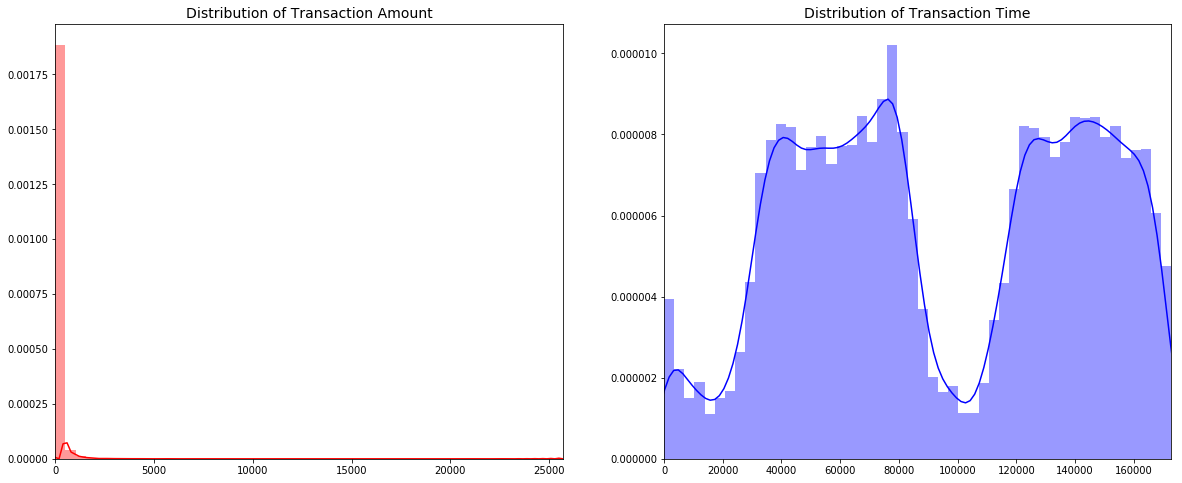

In [6]:
#Distribution of non scaled features

#Source  =   https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

fig, ax = plt.subplots(1, 2, figsize=(20,8))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [7]:
df['Class'].value_counts()[0]

284315

In [11]:
100*(df['Class'].value_counts()[1]/(df['Class'].value_counts()[0]+df['Class'].value_counts()[1]))

0.1727485630620034

In [8]:
X = df.drop(['Class'],1)
Y = df['Class']

In [9]:
# T T S assign
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25)

In [32]:
np.random.randint(10000)

7351

In [66]:
params = {'loss': ['deviance','exponential'],
         'learning_rate' : [ .01, 0.1,.2],
         'n_estimators': [600,800],
         'subsample': [.8, .9],
         'min_samples_split':[2,3],
         'min_weight_fraction_leaf': [0,.1,.2,.5],
         'max_depth': [2],
         'tol':[0.00001],
          'random_state':[7351]
         }

In [67]:
clf = ensemble.GradientBoostingClassifier()

In [68]:
# Given our relatively small data set let's set our folds to be slightly larger size
grid = GridSearchCV(clf, params, cv=4, verbose=10,n_jobs=5)

In [69]:
# DO NOT RE RUN THIS!!!!!
start_time = time.time()

#Fit the Data
grid.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

Fitting 4 folds for each of 192 candidates, totalling 768 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:  3.9min
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:  8.0min
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed: 14.8min
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed: 21.1min
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed: 30.2min
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed: 34.9min
[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed: 44.3min
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed: 49.5min
[Parallel(n_jobs=5)]: Done  75 tasks      | elapsed: 61.1min
[Parallel(n_jobs=5)]: Done  88 tasks      | elapsed: 71.6min
[Parallel(n_jobs=5)]: Done 103 tasks      | elapsed: 84.1min
[Parallel(n_jobs=5)]: Done 118 tasks      | elapsed: 94.3min
[Parallel(n_jobs=5)]: Done 135 tasks      | elapsed: 105.4min
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed: 121.9min
[Parallel(n_jobs=5)]: Done 171 tasks      | elapsed: 137.9min
[Parall

--- 43805.32000255585 seconds ---


In [90]:
grid.best_score_

0.9995833430865383

In [80]:
BP = grid.best_params_

In [99]:
BP

{'learning_rate': 0.1,
 'loss': 'exponential',
 'max_depth': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0,
 'n_estimators': 800,
 'random_state': 7351,
 'subsample': 0.8,
 'tol': 1e-05}

In [91]:
clfb = ensemble.GradientBoostingClassifier(**BP)

In [92]:
clfb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0, n_estimators=800,
              n_iter_no_change=None, presort='auto', random_state=7351,
              subsample=0.8, tol=1e-05, validation_fraction=0.1, verbose=0,
              warm_start=False)

In [93]:
predict_test = clfb.predict(X_test)

In [94]:
table_test = pd.crosstab(y_test, predict_test, margins=True)

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
#Type 1 Error is False positive
#Type 2 Error is False negative
print((
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(test_tI_errors, test_tII_errors))

Test set accuracy:
Percent Type I errors: 9.83118451728884e-05
Percent Type II errors: 0.000491559225864442


In [97]:
print('\n Accuracy by admission status')
print(table_test)

print('\n Percentage accuracy')
print(clfb.score(X_test, y_test))


 Accuracy by admission status
col_0      0    1    All
Class                   
0      71056    7  71063
1         35  104    139
All    71091  111  71202

 Percentage accuracy
0.9994101289289626


In [98]:
table_test[1][1] / table_test['All'][1]

0.7482014388489209

In [17]:
clf = ensemble.GradientBoostingClassifier(learning_rate=0.01, loss='deviance', max_depth=2, min_samples_split=2, min_weight_fraction_leaf=0, n_estimators=500, random_state=7351, subsample=0.9)

In [19]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=7351,
              subsample=0.9, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [36]:
predict_test = clf.predict(X_test)

In [37]:
table_test = pd.crosstab(y_test, predict_test, margins=True)

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
#Type 1 Error is False positive
#Type 2 Error is False negative
print((
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(test_tI_errors, test_tII_errors))

Test set accuracy:
Percent Type I errors: 0.0001404454931041263
Percent Type II errors: 0.0006741383668998062


In [39]:
print('\n Accuracy by admission status')
print(table_test)

print('\n Percentage accuracy')
print(clf.score(X_test, y_test))


 Accuracy by admission status
col_0      0    1    All
Class                   
0      71053   10  71063
1         48   91    139
All    71101  101  71202

 Percentage accuracy
0.9991854161399961


The model above it's not too shabby. It categorizes ~66% of the fraud in our test set.

In [65]:
table_test[1][1] / table_test['All'][1]

0.6546762589928058

In [70]:
43805.32000255585/3600

12.168144445154402